https://finance.yahoo.com/calendar/earnings/?day=2023-12-29


/Users/saumikdana/Machine_Learning_Trading/data/scrape_url.py:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Options data for ENLV:
Average IV for Calls: 3.4995148295084633
Average IV for Puts: nan
Total Call Volume: 61
Total Call open interest: 2509
Total Call engagement: 2570
Total Put Volume: 3.0
Total Put open interest: 3.0
Total Put engagement: 6.0
Number of ITM Call Options: 4
Number of ITM Put Options: 0


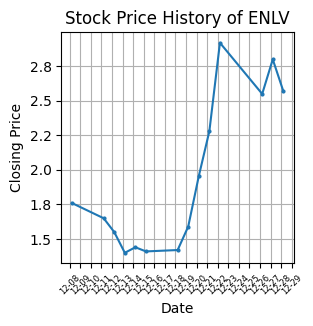

Data fetched for ENLV, entries: 80


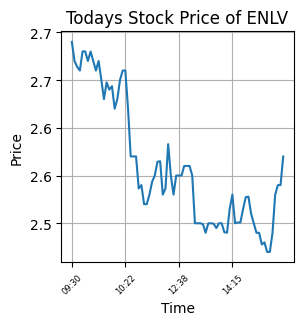

Options data for RDHL:
Average IV for Calls: 2.0580392466517856
Average IV for Puts: 3.3528687190755204
Total Call Volume: 12
Total Call open interest: 1203
Total Call engagement: 1215
Total Put Volume: 27.0
Total Put open interest: 75
Total Put engagement: 102.0
Number of ITM Call Options: 0
Number of ITM Put Options: 6


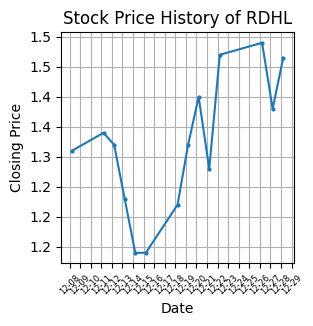

Data fetched for RDHL, entries: 238


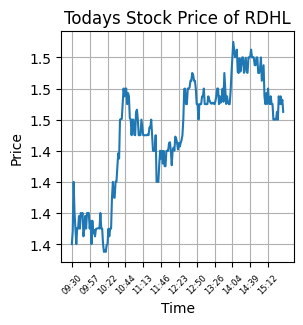

Options data for LILM:
Average IV for Calls: 1.741916688399621
Average IV for Puts: 2.0789275799597537
Total Call Volume: 578.0
Total Call open interest: 43667
Total Call engagement: 44245.0
Total Put Volume: 323.0
Total Put open interest: 4935
Total Put engagement: 5258.0
Number of ITM Call Options: 5
Number of ITM Put Options: 16


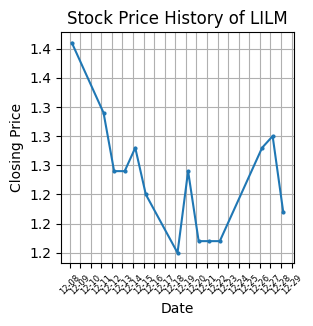

Data fetched for LILM, entries: 278


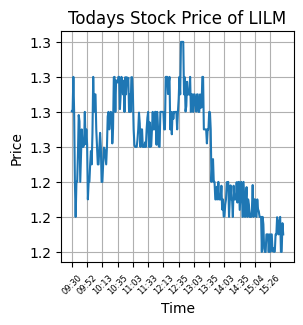

Options data for ONCR:
Average IV for Calls: 0.500005
Average IV for Puts: 1.0000000000000003e-05
Total Call Volume: 15
Total Call open interest: 0
Total Call engagement: 15
Total Put Volume: 0.0
Total Put open interest: 0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1


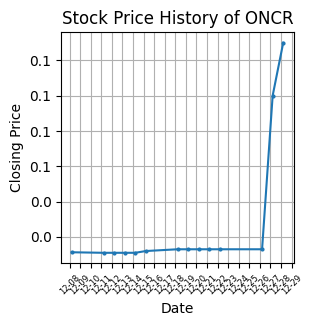

Data fetched for ONCR, entries: 34


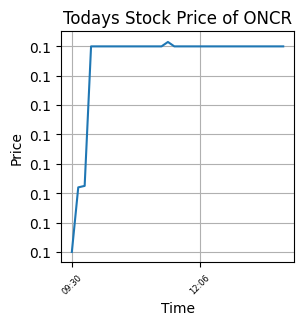

Options data for NMTRQ:
Average IV for Calls: 0.0
Average IV for Puts: nan
Total Call Volume: 0.0
Total Call open interest: 333.0
Total Call engagement: 333.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1


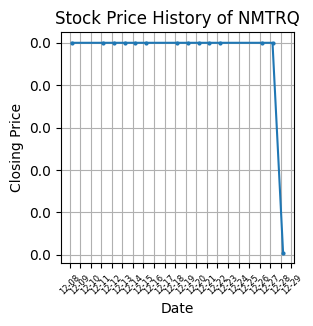

Data fetched for NMTRQ, entries: 4


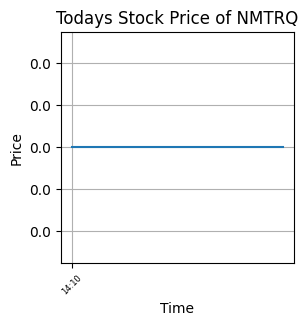

In [1]:
from datetime import datetime, timedelta
from analyze_stock import *  
from scrape_url import *

# Call the function and store the result
day = '2023-12-29'
date = datetime.strptime(day, '%Y-%m-%d')

# Set the time frame
end_date = date + timedelta(days=7)
start_date = date - timedelta(days=21)

# First page
url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day
print(url)

ticker_data_list = process_earnings_table(extract_table(url))
    
# Second page
url += '&offset=100&size=100'

ticker_data_list = process_earnings_table(extract_table(url), ticker_data_list)

# Pandas Dataframe
ticker_data_sorted = convert_to_dataframe(ticker_data_list)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)
    
    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Get All Analysis
    get_info(ticker, options_metrics, start_date, end_date)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
    
del filtered_tickers, ticker_data_list, ticker_data_sorted